<a href="https://colab.research.google.com/github/antonionipo/Modelos-de-Classifica-o-com-Python/blob/main/Case/Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Novamente vocês trabalharão com um problema de Churn, muito utilizado no mercado.
Para isso, faça seguindo o Crisp-DM, a etapa de entendimento das variáveis, entendimento dos dados, descritiva, exploratória, escolha modelos de classificação, façam tunning sobre os resultados e qual deles vocês implementariam.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [77]:
df = pd.read_excel('churn_data.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Target:

Churn — Cliente deu churn ou não

Variáveis numéricas:

Tenure — Número de meses que o cliente está na base
MonthlyCharges — A quantia consumida por cliente mensalmente
TotalCharges — A quantia consumida por cliente total

Variáveis categóricas:

CustomerID - Id do cliente
Gender — M/F
SeniorCitizen — Se o cidadão é ou não idoso (0,1)
Partner — Se o cliente é ou não casado
Dependents — Cliente tem dependentes (Yes, No)
PhoneService — Cliente tem serviço telefonico (Yes, No)
MulitpleLines — Se o cliente tem várias linhas ou não (Yes, No, No Phone Service)
InternetService — Tipo do serviço de internet (DSL, Fiber Optic, None)
OnlineSecurity — Se o cliente tem segurança online (Yes, No, No Internet Service)
OnlineBackup — WSe o cliente tem Backup Online (Yes, No, No Internet Service)
DeviceProtection — Se o cliente tem proteção do dispositivo (Yes, No, No Internet Service)
TechSupport — Se o cliente tem suporte tecnológico (Yes, No, No Internet Service)
StreamingTV — Se o cliente tem streaming de TV (Yes, No, No Internet Service)
StreamingMovies — Se o cliente tem serviço de streaming de filmes (Yes, No, No nternet Service)
Contract — Termo de contrato do cliente (Monthly, 1-Year, 2-Year)
PaperlessBilling — Se o cliente tem ou não boleto sem papel (Yes, No)
PaymentMethod — Método de pagamento do cliente(E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

In [78]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [79]:
df.isna().count()

,0
customerID,7032
gender,7032
SeniorCitizen,7032
Partner,7032
Dependents,7032
tenure,7032
PhoneService,7032
MultipleLines,7032
InternetService,7032
OnlineSecurity,7032


In [80]:
churn_agg = df.groupby('Churn')['customerID'].count().reset_index()

<Axes: xlabel='Churn', ylabel='customerID'>

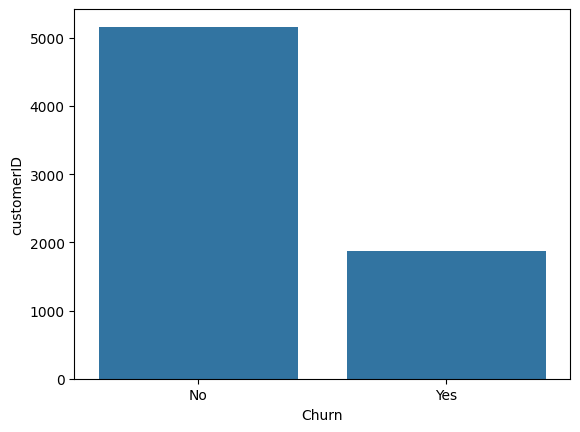

In [81]:
sns.barplot(data=churn_agg, x='Churn', y='customerID')

In [82]:
churn_payment_agg = df.groupby(['Churn', 'PaymentMethod'])['customerID'].count().reset_index()
churn_payment_agg

,Churn,PaymentMethod,customerID
0,No,Bank transfer (automatic),1284
1,No,Credit card (automatic),1289
2,No,Electronic check,1294
3,No,Mailed check,1296
4,Yes,Bank transfer (automatic),258
5,Yes,Credit card (automatic),232
6,Yes,Electronic check,1071
7,Yes,Mailed check,308


<Axes: xlabel='PaymentMethod', ylabel='customerID'>

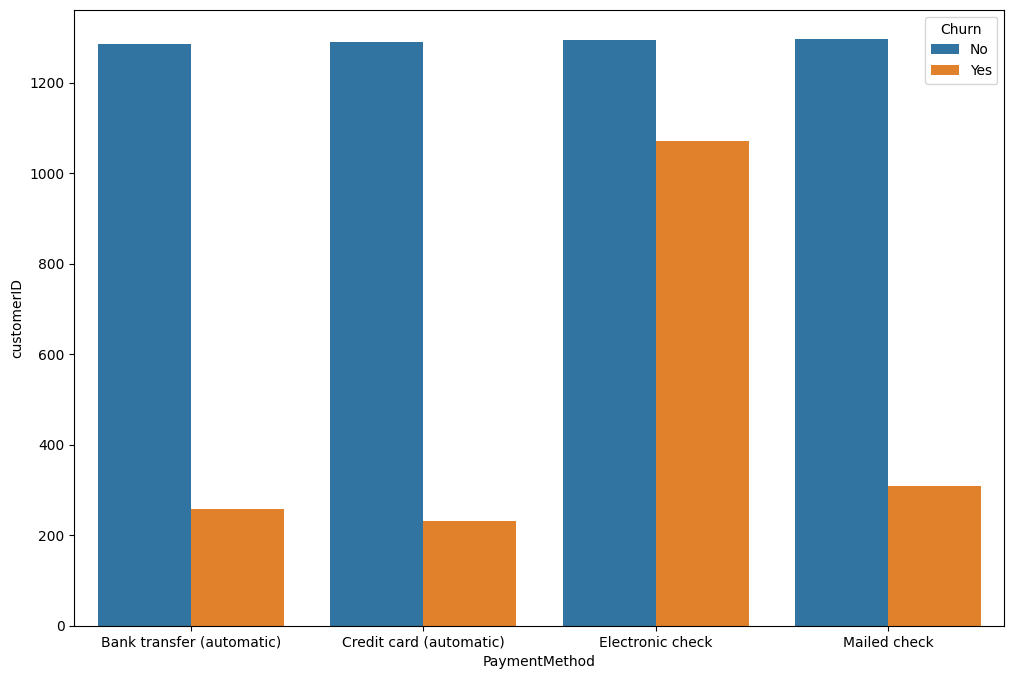

In [83]:
plt.figure(figsize=(12, 8))
sns.barplot(data=churn_payment_agg, x='PaymentMethod', y='customerID', hue='Churn')

In [84]:
churn_gender_agg = df.groupby(['Churn', 'gender'])['customerID'].count().reset_index()
churn_gender_agg

,Churn,gender,customerID
0,No,Female,2544
1,No,Male,2619
2,Yes,Female,939
3,Yes,Male,930


<Axes: xlabel='gender', ylabel='customerID'>

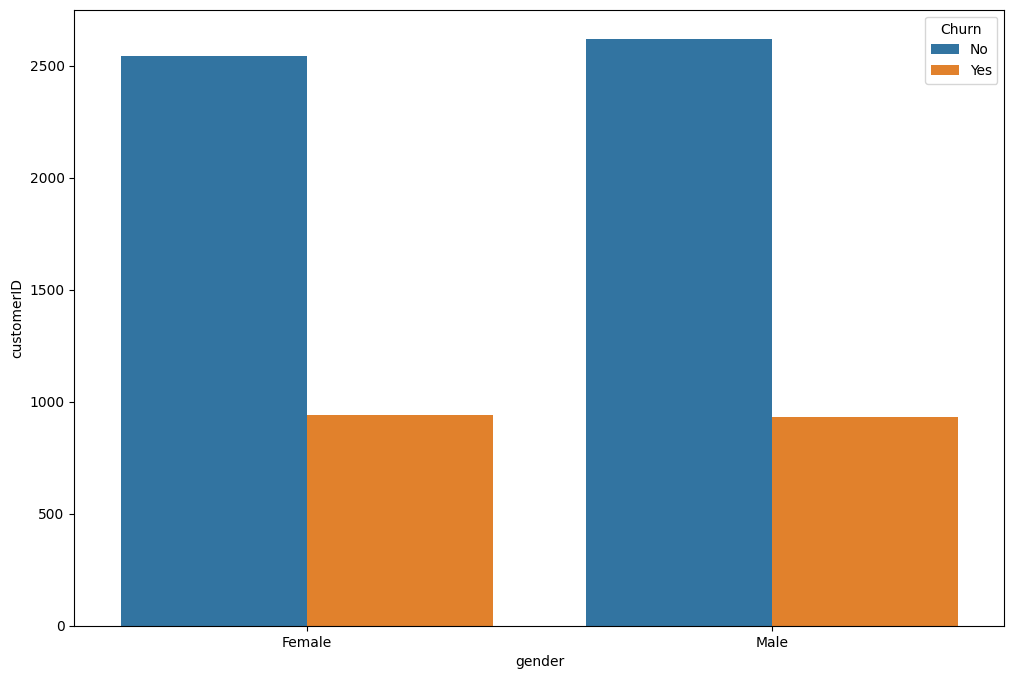

In [85]:
plt.figure(figsize=(12, 8))
sns.barplot(data=churn_gender_agg, x='gender', y='customerID', hue='Churn')

In [86]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [87]:
X = df.drop(['Churn', 'customerID'], axis=1)
y = df['Churn']

In [88]:
le = LabelEncoder()
y = le.fit_transform(y)

X = pd.get_dummies(X)

In [89]:
mm = MinMaxScaler()
X = mm.fit_transform(X)

X = pd.DataFrame(X)

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr = LogisticRegression().fit(X_train, y_train)

In [91]:
lr_pred = lr.predict(X_test)
X_test.assign(Churn=y_test).assign(Churn_pred=lr_pred)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,Churn,Churn_pred
2476,1.0,0.845070,0.067164,0.171123,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
6773,0.0,0.253521,0.064179,0.051587,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
6116,0.0,0.169014,0.835821,0.154650,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
3047,0.0,0.507042,0.366169,0.232166,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
4092,0.0,0.070423,0.111443,0.016461,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,0.0,0.000000,0.007960,0.000029,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
5241,0.0,0.154930,0.759204,0.133251,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1
5456,0.0,0.352113,0.376119,0.177060,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
5842,1.0,0.478873,0.920896,0.440515,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0


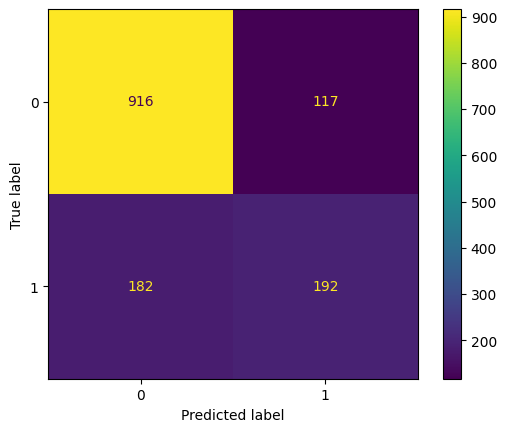

In [92]:
ConfusionMatrixDisplay(confusion_matrix(y_test, lr_pred)).plot()

In [93]:
print(f'Accuracy (Treino): {accuracy_score(y_train, lr.predict(X_train))}')
print(f'Accuracy (Teste): {accuracy_score(y_test, lr.predict(X_test))}')
print(f'Precision (Treino): {precision_score(y_train, lr.predict(X_train))}')
print(f'Precision (Teste): {precision_score(y_test, lr.predict(X_test))}')
print(f'Recall (Treino): {recall_score(y_train, lr.predict(X_train))}')
print(f'Recall (Teste): {recall_score(y_test, lr.predict(X_test))}')
print(f'F1 (Treino): {f1_score(y_train, lr.predict(X_train))}')
print(f'F1 (Teste): {f1_score(y_test, lr.predict(X_test))}')
print(f'ROC AUC (Treino): {roc_auc_score(y_train, lr.predict(X_train))}')
print(f'ROC AUC (Teste): {roc_auc_score(y_test, lr.predict(X_test))}')

Accuracy (Treino): 0.8072888888888888
Accuracy (Teste): 0.7874911158493249
Precision (Treino): 0.6637450199203188
Precision (Teste): 0.6213592233009708
Recall (Treino): 0.557190635451505
Recall (Teste): 0.5133689839572193
F1 (Treino): 0.6058181818181818
F1 (Teste): 0.5622254758418741
ROC AUC (Treino): 0.7275057293480285
ROC AUC (Teste): 0.7000533206330143


In [94]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [95]:
X_test.assign(Churn=y_test).assign(Churn_pred=rf_pred)

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,Churn,Churn_pred
2476,1.0,0.845070,0.067164,0.171123,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
6773,0.0,0.253521,0.064179,0.051587,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
6116,0.0,0.169014,0.835821,0.154650,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
3047,0.0,0.507042,0.366169,0.232166,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
4092,0.0,0.070423,0.111443,0.016461,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1728,0.0,0.000000,0.007960,0.000029,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0
5241,0.0,0.154930,0.759204,0.133251,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,1
5456,0.0,0.352113,0.376119,0.177060,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0
5842,1.0,0.478873,0.920896,0.440515,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0,0


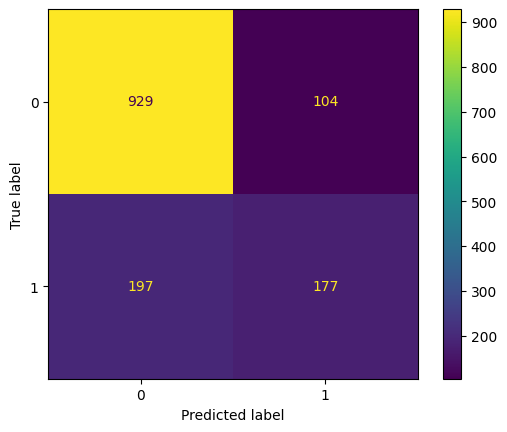

In [96]:
ConfusionMatrixDisplay(confusion_matrix(y_test, rf_pred)).plot()

In [97]:
print(f'Accuracy (Treino): {accuracy_score(y_train, rf.predict(X_train))}')
print(f'Accuracy (Teste): {accuracy_score(y_test, rf.predict(X_test))}')
print(f'Precision (Treino): {precision_score(y_train, rf.predict(X_train))}')
print(f'Precision (Teste): {precision_score(y_test, rf.predict(X_test))}')
print(f'Recall (Treino): {recall_score(y_train, rf.predict(X_train))}')
print(f'Recall (Teste): {recall_score(y_test, rf.predict(X_test))}')
print(f'F1 (Treino): {f1_score(y_train, rf.predict(X_train))}')
print(f'F1 (Teste): {f1_score(y_test, rf.predict(X_test))}')
print(f'ROC AUC (Treino): {roc_auc_score(y_train, rf.predict(X_train))}')
print(f'ROC AUC (Teste): {roc_auc_score(y_test, rf.predict(X_test))}')

Accuracy (Treino): 0.9976888888888888
Accuracy (Teste): 0.7860696517412935
Precision (Treino): 0.9966487935656837
Precision (Teste): 0.6298932384341637
Recall (Treino): 0.9946488294314382
Recall (Teste): 0.4732620320855615
F1 (Treino): 0.995647807164379
F1 (Teste): 0.5404580152671755
ROC AUC (Treino): 0.9967190878392058
ROC AUC (Teste): 0.6862921970689181


In [99]:
parameters = {
    'n_estimators': [25, 50, 100, 200, 300],
    'max_depth': [1, 5, 10, 20],
}
rf_grid = GridSearchCV(rf, scoring='accuracy', param_grid=parameters, cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10, 20],
                         'n_estimators': [25, 50, 100, 200, 300]},
             scoring='accuracy')

In [100]:
parameters_best = rf_grid.best_params_
parameters_best

{'max_depth': 10, 'n_estimators': 50}

In [101]:
rf = RandomForestClassifier(**parameters_best)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

In [102]:
print(f'Accuracy (Treino): {accuracy_score(y_train, rf.predict(X_train))}')
print(f'Accuracy (Teste): {accuracy_score(y_test, rf.predict(X_test))}')
print(f'Precision (Treino): {precision_score(y_train, rf.predict(X_train))}')
print(f'Precision (Teste): {precision_score(y_test, rf.predict(X_test))}')
print(f'Recall (Treino): {recall_score(y_train, rf.predict(X_train))}')
print(f'Recall (Teste): {recall_score(y_test, rf.predict(X_test))}')
print(f'F1 (Treino): {f1_score(y_train, rf.predict(X_train))}')
print(f'F1 (Teste): {f1_score(y_test, rf.predict(X_test))}')
print(f'ROC AUC (Treino): {roc_auc_score(y_train, rf.predict(X_train))}')
print(f'ROC AUC (Teste): {roc_auc_score(y_test, rf.predict(X_test))}')

Accuracy (Treino): 0.8768
Accuracy (Teste): 0.7882018479033405
Precision (Treino): 0.8089368258859785
Precision (Teste): 0.6266666666666667
Recall (Treino): 0.7023411371237458
Recall (Teste): 0.5026737967914439
F1 (Treino): 0.7518796992481203
F1 (Teste): 0.5578635014836796
ROC AUC (Treino): 0.8211463554868124
ROC AUC (Teste): 0.6971258625777161


In [103]:
parameters = {
    'n_estimators': [300, 500, 1000],
    'max_depth': [10],
}
rf_grid = GridSearchCV(rf, scoring='accuracy', param_grid=parameters, cv=5)
rf_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_depth=10, n_estimators=50),
             param_grid={'max_depth': [10], 'n_estimators': [300, 500, 1000]},
             scoring='accuracy')

In [104]:
parameters_best = rf_grid.best_params_
parameters_best

{'max_depth': 10, 'n_estimators': 500}

In [105]:
print(f'Accuracy (Treino): {accuracy_score(y_train, rf.predict(X_train))}')
print(f'Accuracy (Teste): {accuracy_score(y_test, rf.predict(X_test))}')
print(f'Precision (Treino): {precision_score(y_train, rf.predict(X_train))}')
print(f'Precision (Teste): {precision_score(y_test, rf.predict(X_test))}')
print(f'Recall (Treino): {recall_score(y_train, rf.predict(X_train))}')
print(f'Recall (Teste): {recall_score(y_test, rf.predict(X_test))}')
print(f'F1 (Treino): {f1_score(y_train, rf.predict(X_train))}')
print(f'F1 (Teste): {f1_score(y_test, rf.predict(X_test))}')
print(f'ROC AUC (Treino): {roc_auc_score(y_train, rf.predict(X_train))}')
print(f'ROC AUC (Teste): {roc_auc_score(y_test, rf.predict(X_test))}')

Accuracy (Treino): 0.8768
Accuracy (Teste): 0.7882018479033405
Precision (Treino): 0.8089368258859785
Precision (Teste): 0.6266666666666667
Recall (Treino): 0.7023411371237458
Recall (Teste): 0.5026737967914439
F1 (Treino): 0.7518796992481203
F1 (Teste): 0.5578635014836796
ROC AUC (Treino): 0.8211463554868124
ROC AUC (Teste): 0.6971258625777161
